In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ruptures as rpt

RUNOFF

In [2]:
df = pd.read_csv(r'G:\My Drive\Doutorado\TESE\2. Artigo 2\Artigo Pantanal - LULCC\Codes\pantanal-lc\2024_reviews\Data\ANA_Runoff.csv', usecols = ['hydro_year', 'runoff_mm'])

[10, 35, 55, 57]


C:\Users\cb3910\AppData\Roaming\Python\Python312\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


IndexError: index 57 is out of bounds for axis 0 with size 57

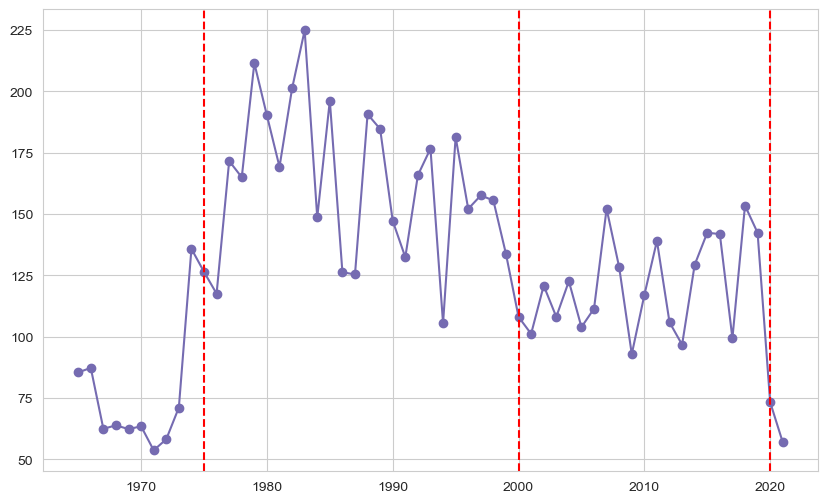

In [8]:
x = np.array(df['hydro_year'])
y = np.array(df['runoff_mm'])

# Perform BCPA
model = rpt.Binseg(model="normal").fit(y)
result = model.predict(n_bkps=3)  
print (result)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(x, y, marker='o', color='#756bb1', label='Runoff (mm)')  # Set the color of the runoff line

for bk in result:
    plt.axvline(x=x[bk], color='red', linestyle='--', label='Change Point' if bk == result[0] else "")

plt.yticks(np.arange(min(y), max(y)+5, 5))  # Adjust this range based on your runoff data

plt.xlabel('Year')
plt.ylabel('Runoff (mm)')
plt.title('Bayesian Change Point Analysis')
plt.tight_layout()
#plt.savefig('BCPA_runoff.tiff', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
def segmented_regression(x, y, break_points):
    segments = len(break_points) + 1
    reg_models = []

    # Fit regression models for each segment
    for i in range(segments):
        if i == 0:
            segment_x = x[:break_points[i]]
            segment_y = y[:break_points[i]]
        elif i == segments - 1:
            segment_x = x[break_points[i-1]:]
            segment_y = y[break_points[i-1]:]
        else:
            segment_x = x[break_points[i-1]:break_points[i]]
            segment_y = y[break_points[i-1]:break_points[i]]

        reg_model = LinearRegression()
        reg_model.fit(segment_x.reshape(-1, 1), segment_y)
        reg_models.append(reg_model)

    return reg_models

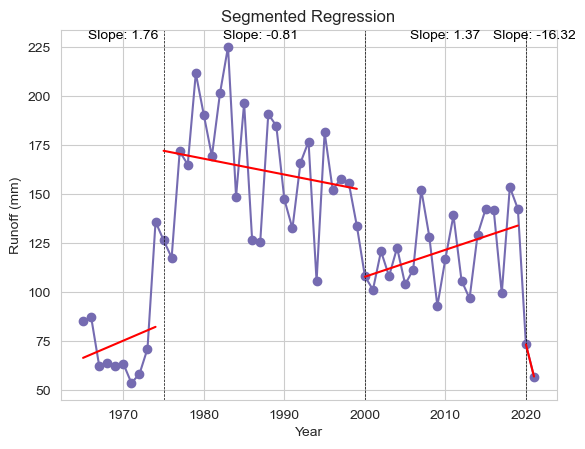

In [7]:
break_points = [10, 35, 55]  
reg_models = segmented_regression(x, y, break_points)

sns.set_style("whitegrid")
plt.plot(x, y, color='#756bb1', label='Data')

# Plot the segments and trend lines
for i, reg_model in enumerate(reg_models):
    if i == 0:
        segment_x = x[:break_points[i]]
        segment_y = y[:break_points[i]]
    elif i == len(reg_models) - 1:
        segment_x = x[break_points[i-1]:]
        segment_y = y[break_points[i-1]:]
    else:
        segment_x = x[break_points[i-1]:break_points[i]]
        segment_y = y[break_points[i-1]:break_points[i]]

    # Plot the segment points
    plt.scatter(segment_x, segment_y, color='#756bb1', label=f'Segment {i+1} Points')

    # Plot the trend line
    plt.plot(segment_x, reg_model.predict(segment_x.reshape(-1, 1)), color='r', label=f'Segment {i+1} Trend Line')

    # Add vertical line at the year that divides each segment
    if i < len(break_points):
        plt.axvline(x[break_points[i]], color='k', linestyle='--', linewidth=0.5)

    slope = reg_model.coef_[0]
    text_x = segment_x[int(len(segment_x) / 2)]  # Place the annotation at the midpoint of the segment
    text_y = plt.ylim()[1]  # Set the y-coordinate at the top of the graph
    plt.text(text_x, text_y, f'Slope: {slope:.2f}', color='k', ha='center', va='top')

plt.xlabel('Year')
plt.ylabel('Runoff (mm)')
plt.title('Segmented Regression')
#plt.savefig('SR_runoff.tiff', dpi=300, bbox_inches='tight')
plt.show()

POTENTIAL EVAPOTRANSPIRATION - PET

In [15]:
df = pd.read_csv(r'G:\My Drive\Doutorado\TESE\2. Artigo 2\Artigo Pantanal - LULCC\Codes\pantanal-lc\2024_reviews\Data\ERA-5_annualPET_BHPM.csv')

[10, 25, 50, 71]


C:\Users\cb3910\AppData\Roaming\Python\Python312\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


IndexError: index 71 is out of bounds for axis 0 with size 71

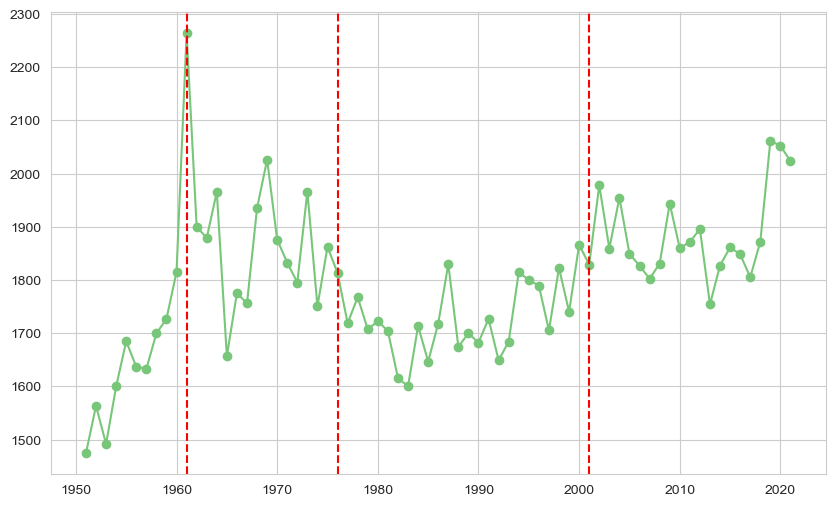

In [16]:
x = np.array(df['hydro_year'])
y = np.array(df['ETr'])

# Perform BCPA
model = rpt.Binseg(model="normal").fit(y)
result = model.predict(n_bkps=3)  
print (result)


plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='#78c679', label='PET (mm)')  # Set the color of the runoff line

for bk in result:
    plt.axvline(x=x[bk], color='red', linestyle='--', label='Change Point' if bk == result[0] else "")

plt.yticks(np.arange(min(y), max(y)+5, 5))  # Adjust this range based on your runoff data

plt.xlabel('Year')
plt.ylabel('PET (mm)')
plt.title('Bayesian Change Point Analysis')
plt.legend()
plt.tight_layout()
#plt.savefig('BCPA_PET.tiff', dpi=300, bbox_inches='tight')
plt.show()

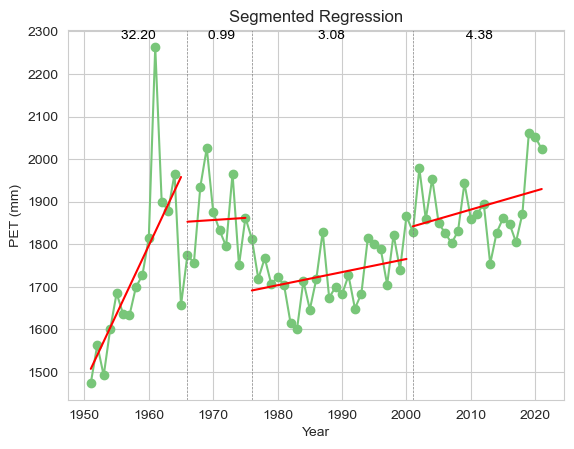

In [11]:
break_points = [15, 25, 50]    # Indices of the break points in the time series

reg_models = segmented_regression(x, y, break_points)

sns.set_style("whitegrid")
plt.plot(x, y, color='#78c679', label='Data')

# Plot the segments and trend lines
for i, reg_model in enumerate(reg_models):
    if i == 0:
        segment_x = x[:break_points[i]]
        segment_y = y[:break_points[i]]
    elif i == len(reg_models) - 1:
        segment_x = x[break_points[i-1]:]
        segment_y = y[break_points[i-1]:]
    else:
        segment_x = x[break_points[i-1]:break_points[i]]
        segment_y = y[break_points[i-1]:break_points[i]]

    # Plot the segment points
    plt.scatter(segment_x, segment_y, color='#78c679', label=f'Segment {i+1} Points')

    # Plot the trend line
    plt.plot(segment_x, reg_model.predict(segment_x.reshape(-1, 1)), color='r', label=f'Segment {i+1} Trend Line')

    # Add vertical line at the year that divides each segment
    if i < len(break_points):
        plt.axvline(x[break_points[i]], color='gray', linestyle='--', linewidth=0.5)
        
    # Add text annotation for the slope at the top of the graph
    slope = reg_model.coef_[0]
    text_x = segment_x[int(len(segment_x) / 2)]  # Place the annotation at the midpoint of the segment
    text_y = plt.ylim()[1]  # Set the y-coordinate at the top of the graph
    plt.text(text_x, text_y, f' {slope:.2f}', color='k', ha='center', va='top')

plt.xlabel('Year')
plt.ylabel('PET (mm)')
plt.title('Segmented Regression')
#plt.savefig('SR_PET.tiff', dpi=300, bbox_inches='tight')
plt.show()

TEMPERATURE

In [10]:
df = pd.read_csv(r'G:\My Drive\Doutorado\TESE\2. Artigo 2\Artigo Pantanal - LULCC\Codes\pantanal-lc\2024_reviews\Data\ERA-5_annualTEMP_BHPM.csv')

[25, 35, 50, 72]


C:\Users\cb3910\AppData\Roaming\Python\Python312\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


IndexError: index 72 is out of bounds for axis 0 with size 72

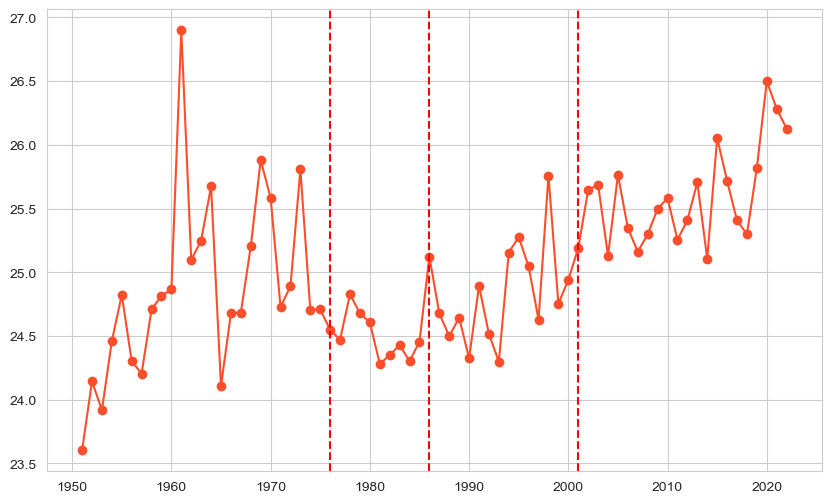

In [11]:
x = np.array(df['hydro_year'])
y = np.array(df['TEMP'])

# Perform BCPA
model = rpt.Binseg(model="normal").fit(y)
result = model.predict(n_bkps=3)  
print (result)


plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='#fc4e2a', label='Temperature (°C)')  # Set the color of the runoff line

for bk in result:
    plt.axvline(x=x[bk], color='red', linestyle='--', label='Change Point' if bk == result[0] else "")

plt.yticks(np.arange(min(y), max(y)+5, 5))  # Adjust this range based on your runoff data

plt.xlabel('Year')
plt.ylabel('PET (mm)')
plt.title('Bayesian Change Point Analysis')
plt.legend()
plt.tight_layout()
#plt.savefig('BCPA_temp.tiff', dpi=300, bbox_inches='tight')
plt.show()

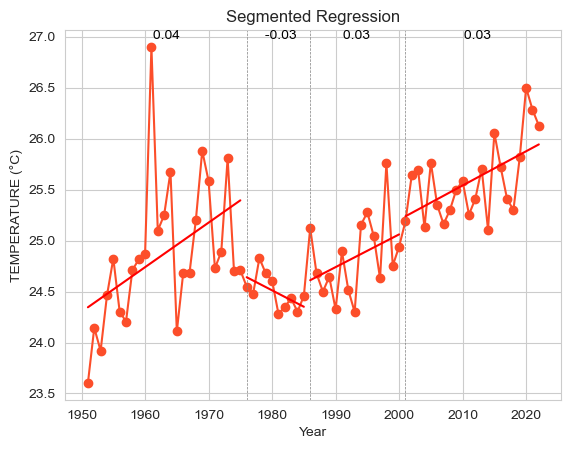

In [13]:
break_points = [25, 35, 50]    
reg_models = segmented_regression(x, y, break_points)

sns.set_style("whitegrid")
plt.plot(x, y, color='#fc4e2a', label='Data')

# Plot the segments and trend lines
for i, reg_model in enumerate(reg_models):
    if i == 0:
        segment_x = x[:break_points[i]]
        segment_y = y[:break_points[i]]
    elif i == len(reg_models) - 1:
        segment_x = x[break_points[i-1]:]
        segment_y = y[break_points[i-1]:]
    else:
        segment_x = x[break_points[i-1]:break_points[i]]
        segment_y = y[break_points[i-1]:break_points[i]]

    # Plot the segment points
    plt.scatter(segment_x, segment_y, color='#fc4e2a', label=f'Segment {i+1} Points')

    # Plot the trend line
    plt.plot(segment_x, reg_model.predict(segment_x.reshape(-1, 1)), color='r', label=f'Segment {i+1} Trend Line')

    # Add vertical line at the year that divides each segment
    if i < len(break_points):
        plt.axvline(x[break_points[i]], color='gray', linestyle='--', linewidth=0.5)
        
    # Add text annotation for the slope at the top of the graph
    slope = reg_model.coef_[0]
    text_x = segment_x[int(len(segment_x) / 2)]  # Place the annotation at the midpoint of the segment
    text_y = plt.ylim()[1]  # Set the y-coordinate at the top of the graph
    plt.text(text_x, text_y, f' {slope:.2f}', color='k', ha='center', va='top')

plt.xlabel('Year')
plt.ylabel('TEMPERATURE (°C)')
plt.title('Segmented Regression')
#plt.savefig('SR_temp.tiff', dpi=300, bbox_inches='tight')
plt.show()

VPD

In [14]:
df = pd.read_csv(r'G:\My Drive\Doutorado\TESE\2. Artigo 2\Artigo Pantanal - LULCC\Codes\pantanal-lc\2024_reviews\Data\ERA-5_annualVPD_BHPM.csv')

[10, 25, 50, 71]


C:\Users\cb3910\AppData\Roaming\Python\Python312\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


IndexError: index 71 is out of bounds for axis 0 with size 71

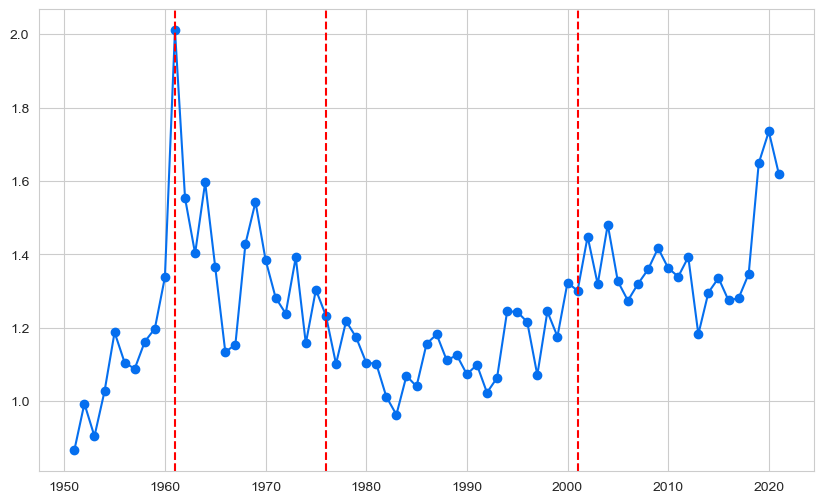

In [16]:
x = np.array(df['hydro_year'])
y = np.array(df['VPD'])

# Perform BCPA
model = rpt.Binseg(model="normal").fit(y)
result = model.predict(n_bkps=3)  
print (result)


plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='#056FEF', label='VPD (kPa)')  # Set the color of the runoff line

for bk in result:
    plt.axvline(x=x[bk], color='red', linestyle='--', label='Change Point' if bk == result[0] else "")

plt.yticks(np.arange(min(y), max(y)+5, 5))  # Adjust this range based on your runoff data

plt.xlabel('Year')
plt.ylabel('VPD (kPa)')
plt.title('Bayesian Change Point Analysis')
plt.legend()
plt.tight_layout()
#plt.savefig('BCPA_VPD.tiff', dpi=300, bbox_inches='tight')
plt.show()

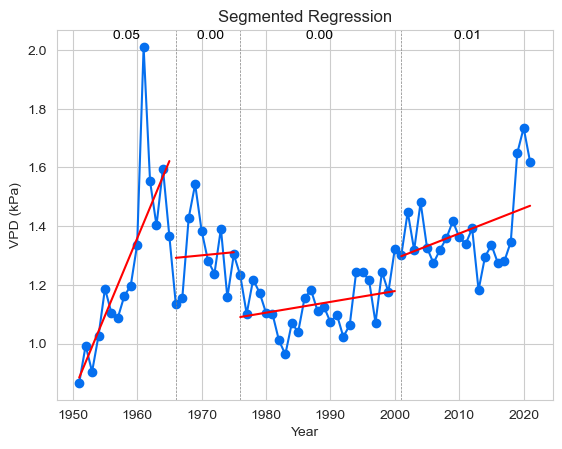

In [17]:
break_points = [15, 25, 50] 
reg_models = segmented_regression(x, y, break_points)

sns.set_style("whitegrid")
plt.plot(x, y, color='#056FEF', label='Data')

# Plot the segments and trend lines
for i, reg_model in enumerate(reg_models):
    if i == 0:
        segment_x = x[:break_points[i]]
        segment_y = y[:break_points[i]]
    elif i == len(reg_models) - 1:
        segment_x = x[break_points[i-1]:]
        segment_y = y[break_points[i-1]:]
    else:
        segment_x = x[break_points[i-1]:break_points[i]]
        segment_y = y[break_points[i-1]:break_points[i]]

    # Plot the segment points
    plt.scatter(segment_x, segment_y, color='#056FEF', label=f'Segment {i+1} Points')

    # Plot the trend line
    plt.plot(segment_x, reg_model.predict(segment_x.reshape(-1, 1)), color='r', label=f'Segment {i+1} Trend Line')

    # Add vertical line at the year that divides each segment
    if i < len(break_points):
        plt.axvline(x[break_points[i]], color='gray', linestyle='--', linewidth=0.5)
        
    # Add text annotation for the slope at the top of the graph
    slope = reg_model.coef_[0]
    text_x = segment_x[int(len(segment_x) / 2)]  # Place the annotation at the midpoint of the segment
    text_y = plt.ylim()[1]  # Set the y-coordinate at the top of the graph
    plt.text(text_x, text_y, f' {slope:.2f}', color='k', ha='center', va='top')

plt.xlabel('Year')
plt.ylabel('VPD (kPa)')
plt.title('Segmented Regression')
#plt.legend()
#plt.savefig('SR_VPD.tiff', dpi=300, bbox_inches='tight')
plt.show()